In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow import keras


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Rescale pixel values to [0, 1]
    rotation_range=15,    # Rotate images up to 15 degrees
    width_shift_range=0.1,  # Shift images horizontally up to 10% of width
    height_shift_range=0.1,  # Shift images vertically up to 10% of height
    shear_range=0.1,        # Shear transformations
    zoom_range=0.1,         # Zoom in/out by up to 10% # Fill in new pixels using the nearest neighbor value
    validation_split=0.2,    # Split dataset into training and validation

)



In [ ]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Car_Damage_Severity_Dataset/training',
    target_size=(224, 224),
    color_mode='rgb',
    shuffle=True,
    seed=123,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Car_Damage_Severity_Dataset/validation',
     target_size=(224, 224),
     shuffle=True,
     seed=123,
     color_mode='rgb',
     class_mode='categorical',
     batch_size=32,
     subset='validation'
)

Found 1108 images belonging to 3 classes.
Found 51 images belonging to 3 classes.


In [ ]:
class_names=list(train_generator.class_indices.keys())
class_names

['01-minor', '02-moderate', '03-severe']

In [ ]:

# Get the dimensions of the images
image_height, image_width, _ = train_generator.image_shape
print(f"Image height: {image_height}")
print(f"Image width: {image_width}")

Image height: 224
Image width: 224


In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import sys
from os.path import join
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#from tensorflow.python.keras.applications import ResNet50

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import ResNet50

import os

In [ ]:
conv_base = ResNet50(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

print(conv_base.summary())

94765736/94765736 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
# Make the conv_base NOT trainable:

for layer in conv_base.layers[:]:
   layer.trainable = False

print('conv_base is now NOT trainable')

conv_base is now NOT trainable


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 30010499 (114.48 MB)
Trainable params: 642

In [ ]:
for i, layer in enumerate(conv_base.layers):
   print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the filepath where you want to save the best model
checkpoint_filepath = '/content/drive/MyDrive/best_model_car_damage_severity.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    save_best_only=True,  # Save only the best model
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Mode for monitoring (maximizing validation accuracy)
    verbose=1  # Print messages
)

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
print("Model compiled")
print(model.summary())

Model compiled
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 30010499 (114.48 MB)
Traina

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/100
35/35 [==============================] - ETA: 0s - loss: 0.9958 - accuracy: 0.3457 
Epoch 1: val_accuracy improved from -inf to 0.49020, saving model to /content/drive/MyDrive/best_model_car_damage_severity.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 889s 25s/step - loss: 0.9958 - accuracy: 0.3457 - val_loss: 0.6960 - val_accuracy: 0.4902
Epoch 2/100
35/35 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.4007
Epoch 2: val_accuracy improved from 0.49020 to 0.54902, saving model to /content/drive/MyDrive/best_model_car_damage_severity.h5
35/35 [==============================] - 22s 620ms/step - loss: 0.6897 - accuracy: 0.4007 - val_loss: 0.6687 - val_accuracy: 0.5490
Epoch 3/100
35/35 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.3971
Epoch 3: val_accuracy did not improve from 0.54902
35/35 [==============================] - 19s 546ms/step - loss: 0.6783 - accuracy: 0.3971 - val_loss: 0.6916 - val_accuracy: 0.4118
Epoch 4/100
35/35 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.3312
Epoch 4: val_accuracy did not improve from 0.54902
35/35 [==============================] - 19s 554ms/step - loss: 0.6941 - accuracy: 0.3312

In [ ]:
!pip install --upgrade tensorflow h5py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 99.9 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
model.load_weights('/content/drive/MyDrive/best_model_car_damage_severity.h5')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)

    return preds

1/1 [==============================] - 3s 3s/step


'01-minor'

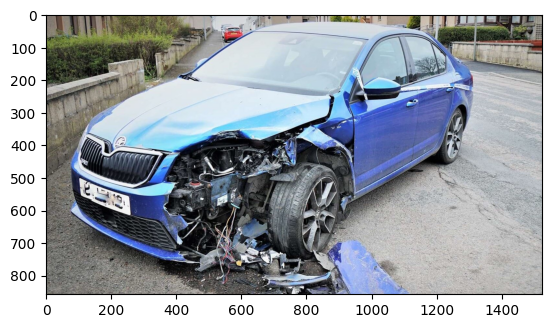

In [ ]:
class_names[np.argmax(make_predictions("/content/car-accident.jpg"))]


1/1 [==============================] - 0s 25ms/step


'03-severe'

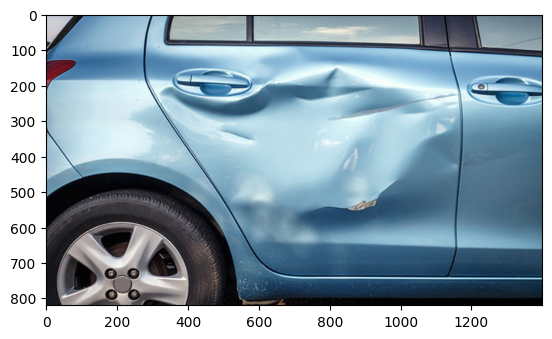

In [ ]:
class_names[np.argmax(make_predictions("/content/deb9f9efc56ef2a940bdf0d58ccaad5c_XL.jpg"))]
